<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 5px; height: 50px"> 

#   Project 4: Detecting Hate Speech

> SG-DSI-41 Group 01: Lionel Foo, Joel Lim, Poon Wenzhe, Daryl Chia

---


## <b> Notebook: 01 EDA & Data Cleaning </b>

---

## 01 Import Libraries

In [1]:
# Import libraries:

# Standard imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing imports:
import contractions
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Other imports:
import os


---

## 02 Load & Check Data

### 02.01 Load & Check Data

In [2]:
# Load data:
comments = pd.read_csv('data/hate-speech-and-offensive-language-dataset.csv')

# Check data:
print(comments.shape)
comments.head()

(24783, 7)


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
# Drop unecessary columns:
comments.drop(columns=['Unnamed: 0',
                       'count',
                       'hate_speech',
                       'offensive_language',
                       'neither'], inplace=True)

comments.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### 02.02 Check Data Information & for Null Values

In [4]:
# Check data info:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [5]:
# Check data for null values:
comments.isnull().sum()

class    0
tweet    0
dtype: int64

### 02.03 Check for Substrings to Clean

In [6]:
# Check for data in column 'tweet' that contain line or tab characters:
print(comments['tweet'].str.contains(r'\r|\t|\n').value_counts())
comments[comments['tweet'].str.contains(r'\r|\t|\n') == True].head()

tweet
False    23866
True       917
Name: count, dtype: int64


,class,tweet
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."
58,1,"""...Son of a bitch took my Tic Tacs.""\n\nI lik..."
74,1,"""@BVSEDCHINK: Yo fuck skateboarding, all y'all..."
75,2,"""@BabyAnimalPics: baby monkey bathtime http://..."
106,1,"""@Crhedrys: Pussy licking pussy.... meow meow ..."


In [7]:
# Check for data in column 'tweet' that contain url substrings:
print(comments['tweet'].str.contains(r'http[s]?\S+').value_counts())
comments[comments['tweet'].str.contains(r'http[s]?\S+') == True].head()

tweet
False    21758
True      3025
Name: count, dtype: int64


,class,tweet
24,1,""" got ya bitch tip toeing on my hardwood floor..."
41,1,""" most hated but the hoes favorite "" #2MW #Sev..."
42,1,""" nice girls bad, make me get naughty. Bad yel..."
45,1,""" pussy is a powerful drug "" &#128517; #HappyH..."
62,1,"""@ARIZZLEINDACUT: Females think dating a pussy..."


In [8]:
# Check for data in column 'tweet' that contain hashtags and emojis:
print(comments['tweet'].str.contains(r'[#|#&].*?\s+').value_counts())
comments[comments['tweet'].str.contains(r'[#|#&].*?\s+') == True].head()

tweet
False    19687
True      5096
Name: count, dtype: int64


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
19,1,""" black bottle &amp; a bad bitch """
23,1,""" fuck no that bitch dont even suck dick "" &#1..."


In [9]:
# Check for data in column 'tweet' that contain tweet mentions:
print(comments['tweet'].str.contains(r'@\S+').value_counts())
comments[comments['tweet'].str.contains(r'@\S+') == True].head()

tweet
True     14199
False    10584
Name: count, dtype: int64


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
# Check for data in column 'tweet' that contain retweet substrings (rt):
print(comments['tweet'].str.contains(r' rt ').value_counts())
comments[comments['tweet'].str.contains(r' rt ') == True].head()

tweet
False    24767
True        16
Name: count, dtype: int64


,class,tweet
2985,0,@DavetheBrave1 that hoe on some other shit bro...
5402,1,@_fullawhite rt me to wey I went to the job in...
5720,2,@charlierose @jdickerson racist@NorahODonnell ...
5992,1,@gabbella03 rt something else from another bit...
6061,2,@hardball @Milbank Chris stop your angry bird ...


In [11]:
# Check for data in column 'tweet' that contain retweet substrings (RT):
print(comments['tweet'].str.contains(r' RT ').value_counts())
comments[comments['tweet'].str.contains(r' RT ') == True].head()

tweet
False    23865
True       918
Name: count, dtype: int64


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
# Check for data in column 'tweet' that contain numbers:
print(comments['tweet'].str.contains(r'[0-9]').value_counts())
comments[comments['tweet'].str.contains(r'[0-9]') == True].head()

tweet
False    13862
True     10921
Name: count, dtype: int64


,class,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...


In [13]:
# Check for data in column 'tweet' that contain punctuations:
print(comments['tweet'].str.contains(r'[^a-zA-Z0-9\s]').value_counts())
comments[comments['tweet'].str.contains(r'[^a-zA-Z0-9\s]') == True].head()

tweet
True     22537
False     2246
Name: count, dtype: int64


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### 02.02 - 02.03 Observations & Findings

<details><summary> Show details: </summary>

> **Data Type**
> - All columns have the correct data type.
>
> **Null Values** (`comment_text`)
> - 0 null tweets observed.
>
> **Substrings to Clean** (`comment_text`)
> - 917 tweets with **line or tab character substrings** observed.
> - 3025 tweets with **url substrings** observed.
> - 5096 tweets with **hashtags and emojis** observed.
> - 14199 tweets with **twitter mention substrings** observed.
> - 934 tweets with **retweet substrings** observed.
> - 10921 tweets with **numbers** observed.
> - 22537 tweets with **punctuations** observed.
>
> **Follow-Up Actions**
> - **Convert** words to lowercase
> - **Convert** contraction words
> - **Replace** these substrings with a single whitespace:
>   - Line or tab characters
>   - url substrings
>   - Hashtags and emojis
>   - Tweet mention substrings
>   - Retweet substrings
>   - Numbers
>   - Punctuations
> - Others:
>   - **Remove** unecessary whitespaces
>   - **Drop** empty string comments

</details>


---

## 03 Clean Data

### 03.01 General

In [14]:
# Convert strings in column 'tweet' to lowercase:
comments['tweet'] = comments['tweet'].str.lower()

In [15]:
# Expand contraction words in column 'tweet':

# Define function:
def expand_contractions(text):
    return contractions.fix(text)

# Apply function:
comments['tweet'] = comments['tweet'].apply(expand_contractions)

### 03.02 Replace Substrings for Relevant Rows

In [16]:
# Replace line of tab characters in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat='\r|\t|\n', repl=' ', regex=True)

In [17]:
# Replace website urls in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat='http[s]?\S+', repl=' ', regex=True)

In [18]:
# Replace hashtags and emojis in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat='[#|#&].*?\s+', repl=' ', regex=True)

In [19]:
# Replace tweet mentions in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat='@\S+', repl=' ', regex=True)

In [20]:
# Replace retweet substrings in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat=' rt ', repl=' ', regex=True)
comments['tweet'] = comments['tweet'].str.replace(pat=r'\brt\b', repl=' ', regex=True)

In [21]:
# Replace numbers in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat='[0-9]', repl=' ', regex=True)

In [22]:
# Replace punctuations in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat='[^a-zA-Z0-9\s]', repl=' ', regex=True)

### 03.03 Others

In [23]:
# Replace empty whitespaces in column 'tweet' with ' ':
comments['tweet'] = comments['tweet'].str.replace(pat='\s+', repl=' ', regex=True)

In [24]:
# Remove trailing whitespaces in column 'tweet':
comments['tweet'] = comments['tweet'].str.strip()

In [25]:
# Remove unecessary whitespaces:
comments['tweet'] = comments['tweet'].str.split(' ').str.join(' ')

In [26]:
# Check for data in column 'comment_text' that are empty strings:
print(comments.shape)
print(comments[comments['tweet'] == '']['tweet'].value_counts())
comments[comments['tweet'] == ''].head()

(24783, 2)
tweet
    10
Name: count, dtype: int64


,class,tweet
846,0,
848,2,
849,2,
923,1,
1016,1,


In [27]:
# Drop rows with empty strings in column 'comment_text':
comments = comments[comments['tweet'] != '']
comments.shape[0]

24773


---

## 04 Analyse Top Words

### 04.01 1-gram Words

In [28]:
# Create list of custom stop words to include common contractions:
stopwords_extra = ["they're", "doesn't", "isn't", "i've", "there's", "aren't", "i'd", "we're", "wasn't", "i'll"]
stopwords_custom = list(ENGLISH_STOP_WORDS.union(stopwords_extra))

In [29]:
# Instantiate 'TF-IDF' vectorizers for 1-gram, 2-gram, and 3-gram words:
# 1-gram:
tvec_1 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(1, 1),
                       max_df=0.03,
                       min_df=2,
                       max_features=50000)

# 2-gram:
tvec_2 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(2, 2),
                       max_df=0.03,
                       min_df=2,
                       max_features=50000)

Text(0.5, 1.0, 'Hate Speech Top Words (1-gram)')

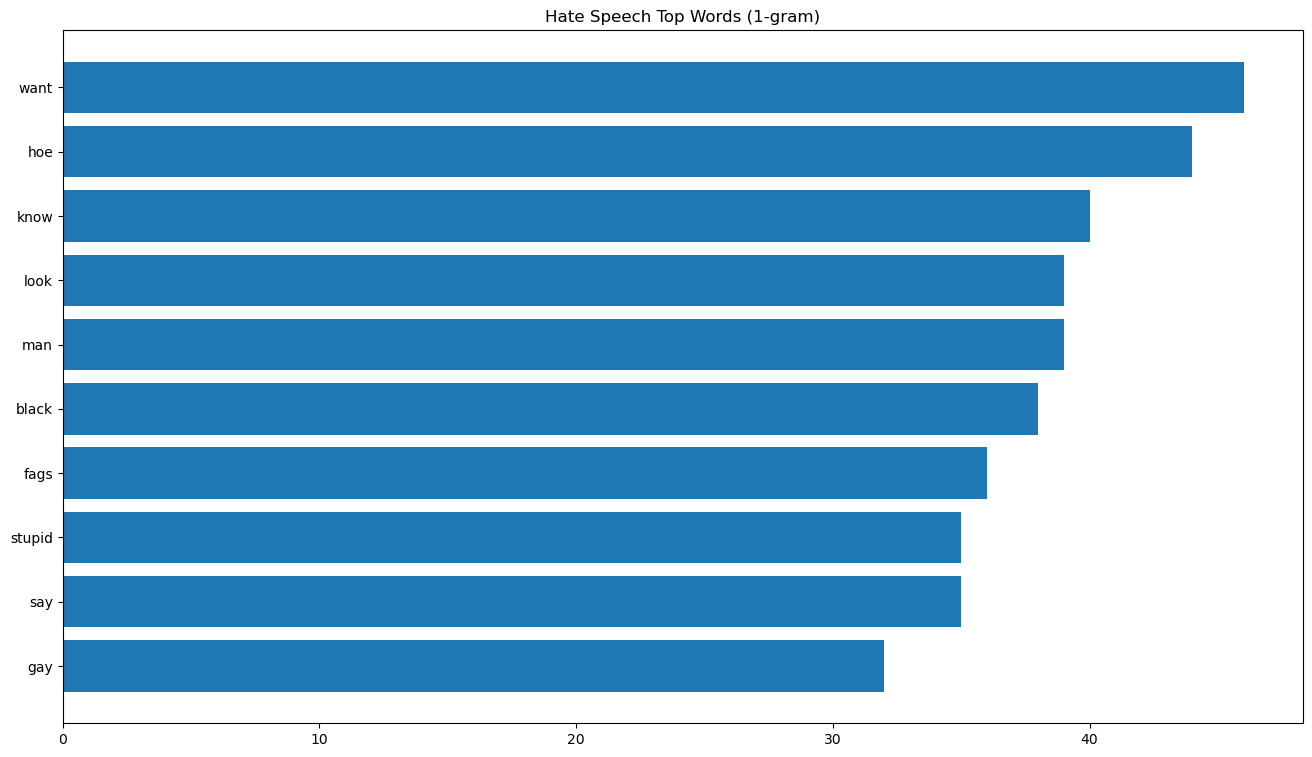

In [30]:
# Check for top occuring 1-gram words for column 'class' = 0:
# Create word frequency dictionary:
comments_vec_z_1 = comments[comments['class'] == 0]['tweet']
comments_vec_z_1 = tvec_1.fit_transform(comments_vec_z_1)
comments_vec_z_1_sum = np.asarray(comments_vec_z_1.sum(axis=0)).ravel()
count_dict_z = {word: comments_vec_z_1_sum[tvec_1.vocabulary_[word]] for word in tvec_1.vocabulary_}
sorted_dict_z = {key: value for key, value in sorted(count_dict_z.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_z.keys())[:10][::-1], width=list(sorted_dict_z.values())[:10][::-1])
plt.title('Hate Speech Top Words (1-gram)')

Text(0.5, 1.0, 'Offensive Speech Top Words (1-gram)')

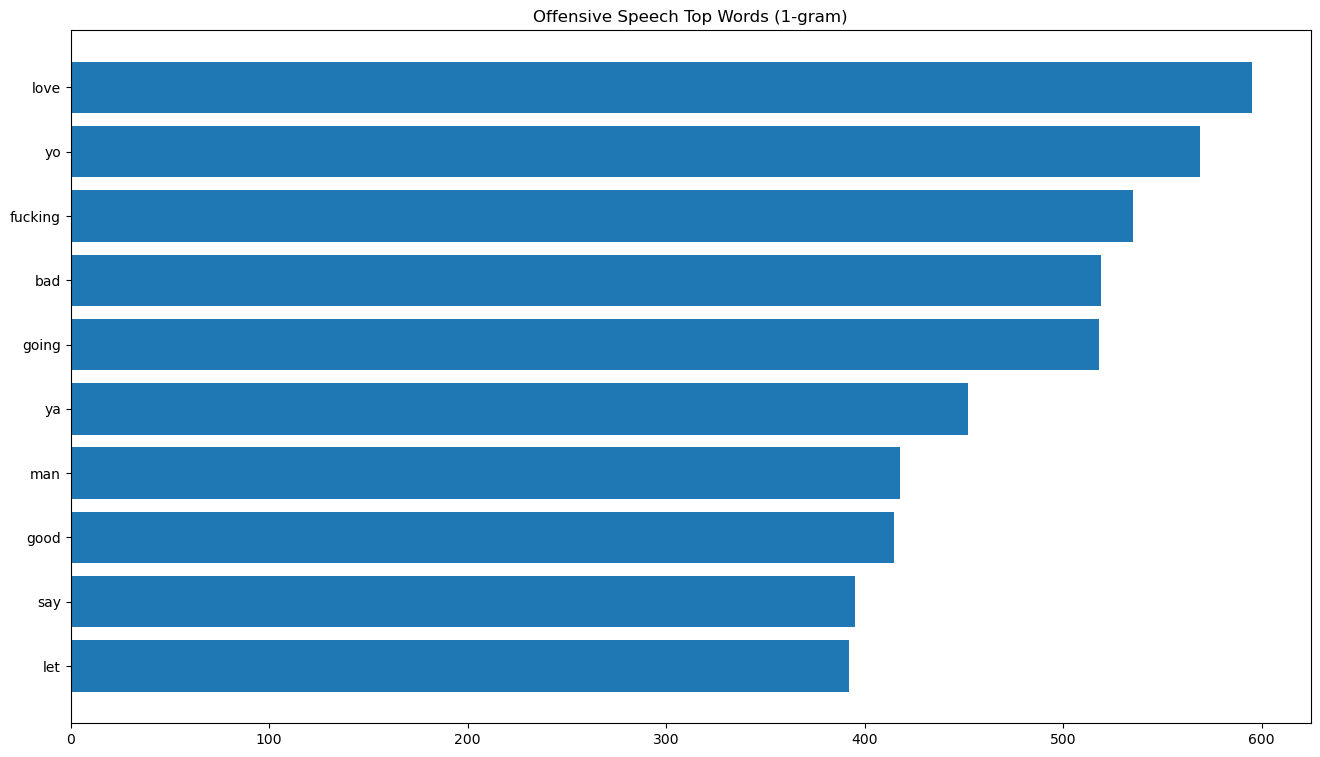

In [31]:
# Check for top occuring 1-gram words for column 'class' = 1:
# Create word frequency dictionary:
comments_vec_z_1 = comments[comments['class'] == 1]['tweet']
comments_vec_z_1 = tvec_1.fit_transform(comments_vec_z_1)
comments_vec_z_1_sum = np.asarray(comments_vec_z_1.sum(axis=0)).ravel()
count_dict_z = {word: comments_vec_z_1_sum[tvec_1.vocabulary_[word]] for word in tvec_1.vocabulary_}
sorted_dict_z = {key: value for key, value in sorted(count_dict_z.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_z.keys())[:10][::-1], width=list(sorted_dict_z.values())[:10][::-1])
plt.title('Offensive Speech Top Words (1-gram)')

Text(0.5, 1.0, '"Neither" Speech Top Words (1-gram)')

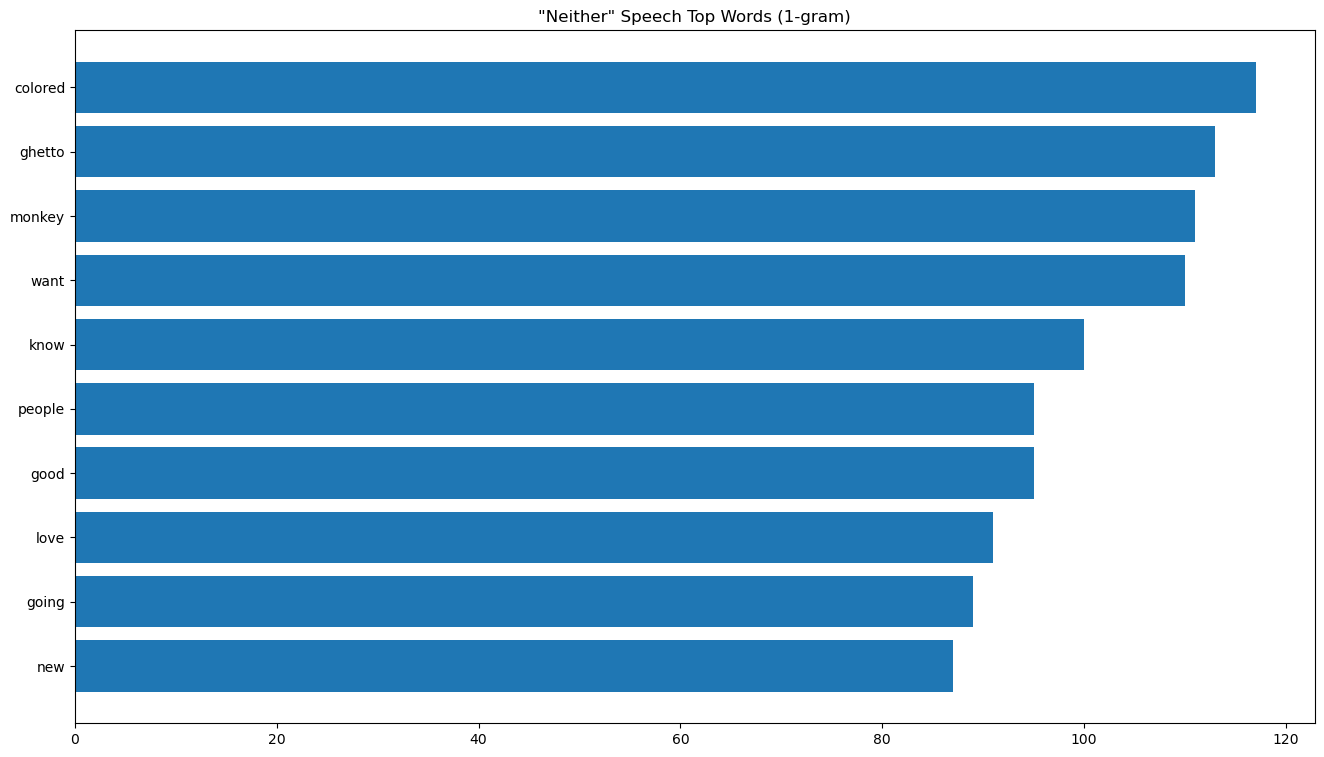

In [32]:
# Check for top occuring 1-gram words for column 'class' = 2:
# Create word frequency dictionary:
comments_vec_z_1 = comments[comments['class'] == 2]['tweet']
comments_vec_z_1 = tvec_1.fit_transform(comments_vec_z_1)
comments_vec_z_1_sum = np.asarray(comments_vec_z_1.sum(axis=0)).ravel()
count_dict_z = {word: comments_vec_z_1_sum[tvec_1.vocabulary_[word]] for word in tvec_1.vocabulary_}
sorted_dict_z = {key: value for key, value in sorted(count_dict_z.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_z.keys())[:10][::-1], width=list(sorted_dict_z.values())[:10][::-1])
plt.title('"Neither" Speech Top Words (1-gram)')

### 04.02 2-gram Words

Text(0.5, 1.0, 'Hate Speech Top Words (2-gram)')

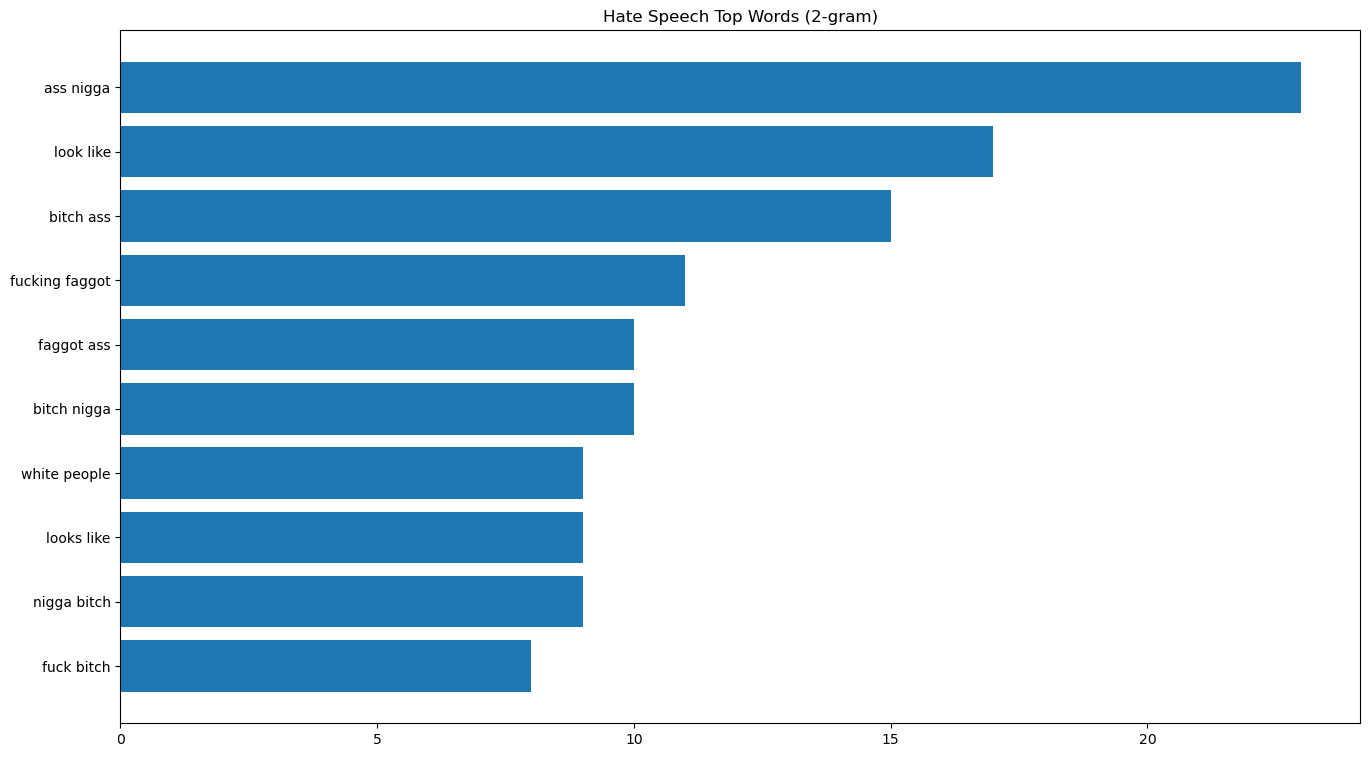

In [33]:
# Check top occuring 2-gram words for column 'class' = 0:
# Create word frequency dictionary:
comments_vec_z_2 = comments[comments['class'] == 0]['tweet']
comments_vec_z_2 = tvec_2.fit_transform(comments_vec_z_2)
comments_vec_z_2_sum = np.asarray(comments_vec_z_2.sum(axis=0)).ravel()
count_dict_z = {word: comments_vec_z_2_sum[tvec_2.vocabulary_[word]] for word in tvec_2.vocabulary_}
sorted_dict_z = {key: value for key, value in sorted(count_dict_z.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_z.keys())[:10][::-1], width=list(sorted_dict_z.values())[:10][::-1])
plt.title('Hate Speech Top Words (2-gram)')

Text(0.5, 1.0, 'Hate Speech Top Words (2-gram)')

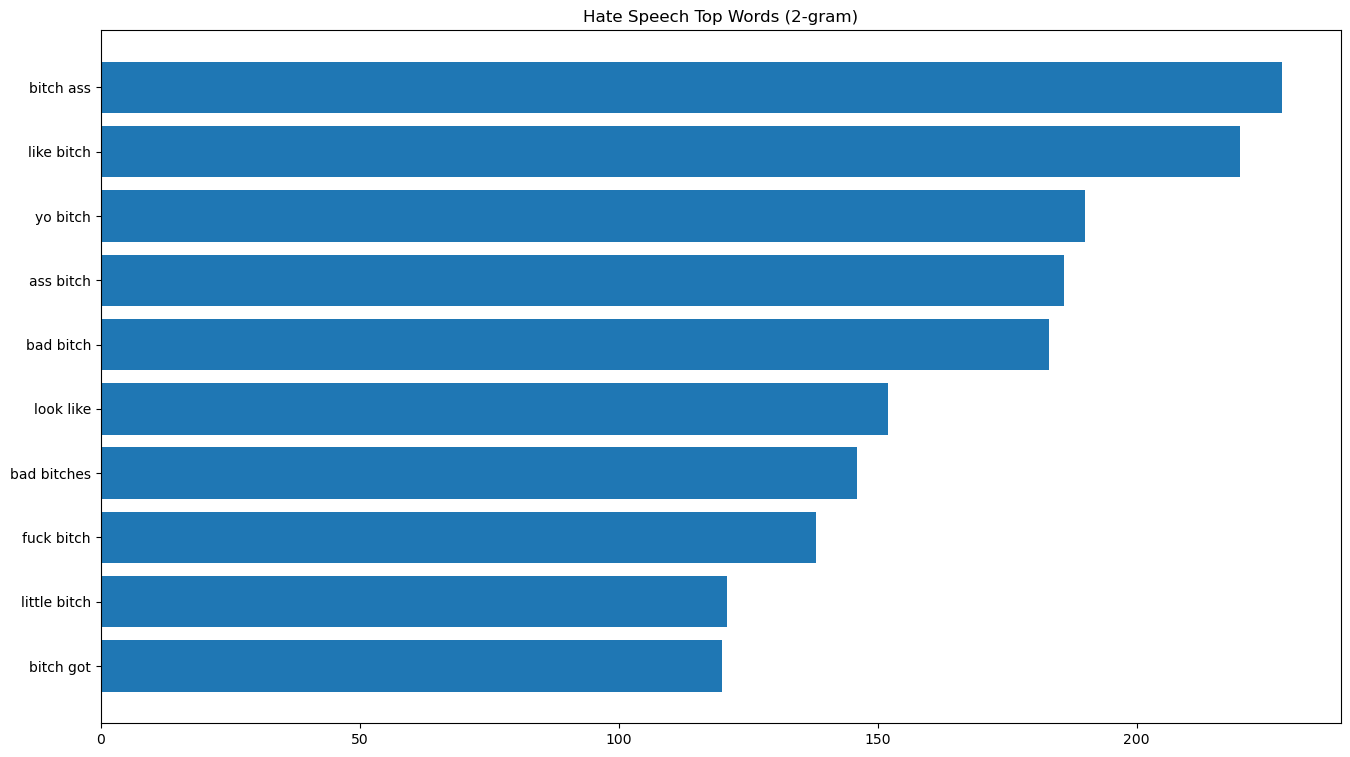

In [34]:
# Check top occuring 2-gram words for column 'class' = 1:
# Create word frequency dictionary:
comments_vec_y_2 = comments[comments['class'] == 1]['tweet']
comments_vec_y_2 = tvec_2.fit_transform(comments_vec_y_2)
comments_vec_y_2_sum = np.asarray(comments_vec_y_2.sum(axis=0)).ravel()
count_dict_y = {word: comments_vec_y_2_sum[tvec_2.vocabulary_[word]] for word in tvec_2.vocabulary_}
sorted_dict_y = {key: value for key, value in sorted(count_dict_y.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_y.keys())[:10][::-1], width=list(sorted_dict_y.values())[:10][::-1])
plt.title('Hate Speech Top Words (2-gram)')

Text(0.5, 1.0, 'Hate Speech Top Words (2-gram)')

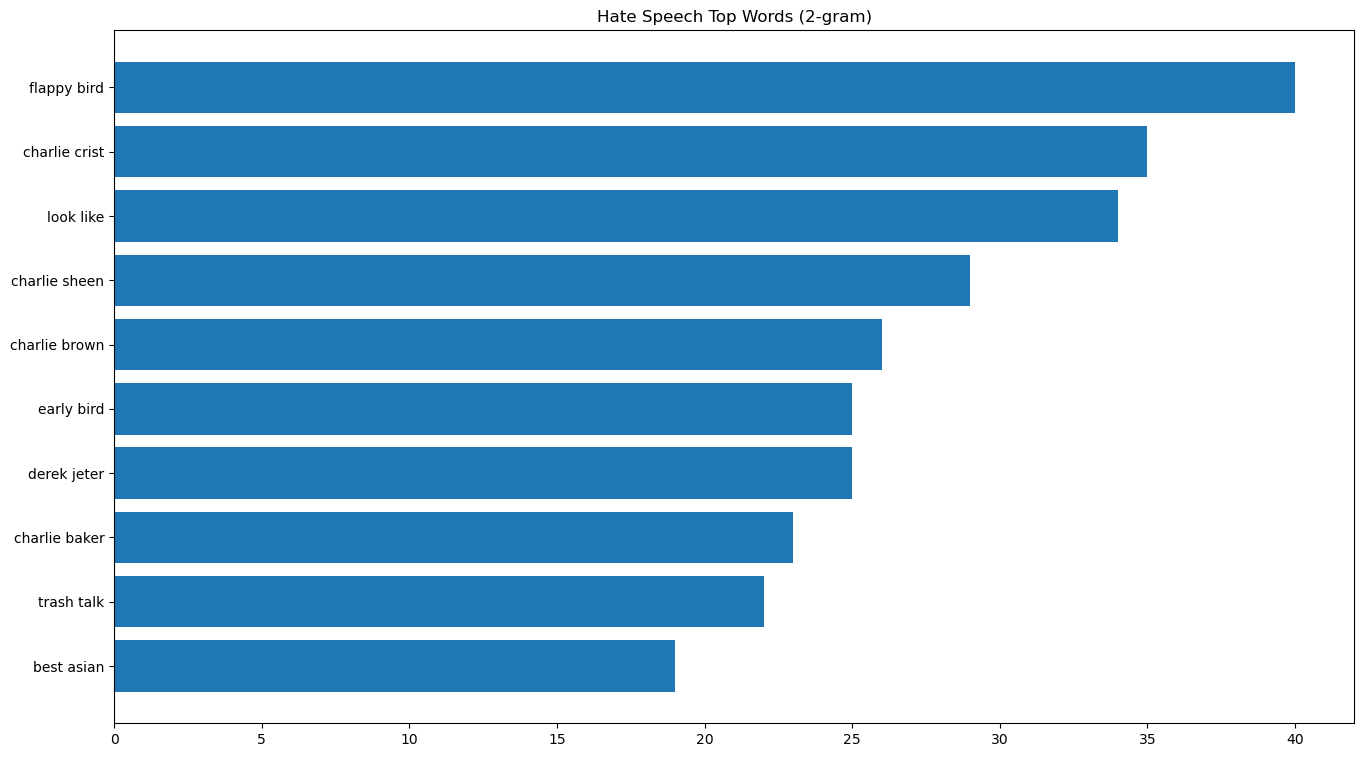

In [35]:
# Check top occuring 2-gram words for column 'class' = 1:
# Create word frequency dictionary:
comments_vec_y_2 = comments[comments['class'] == 2]['tweet']
comments_vec_y_2 = tvec_2.fit_transform(comments_vec_y_2)
comments_vec_y_2_sum = np.asarray(comments_vec_y_2.sum(axis=0)).ravel()
count_dict_y = {word: comments_vec_y_2_sum[tvec_2.vocabulary_[word]] for word in tvec_2.vocabulary_}
sorted_dict_y = {key: value for key, value in sorted(count_dict_y.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict_y.keys())[:10][::-1], width=list(sorted_dict_y.values())[:10][::-1])
plt.title('Hate Speech Top Words (2-gram)')


---

## 05 Export Data

In [36]:
# Create output folder and export data frame 'comments' as 'comments.csv':
comments.to_csv('data/hate-speech-and-offensive-language-dataset_cleaned.csv', index=False)